# **LAB 2 - PART 2 Gradient Descent**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from matplotlib.animation import FuncAnimation
from IPython.display import display, Image

### **Read file, Explore Data, Data Cleansing**

In [ ]:
### START CODE HERE ###
df = pd.read_csv('Gradient-Descent-example-data.csv')
X = df.iloc[:,1:2].values
y = df.iloc[:,2:].values
df['Bitcoin Increment original'] = y
### END CODE HERE ###

### **Create a `Bitcoin Increment_standardize` columns**

In [ ]:
### START CODE HERE ###
standardize_scaler = preprocessing.StandardScaler()
df['Bitcoin Increment'] = standardize_scaler.fit_transform(y)
df.rename(columns={'Bitcoin Increment': 'Bitcoin Increment_standardize'}, inplace=True)
### END CODE HERE ###
df

,No,Gold Price Increment,Bitcoin Increment_standardize,Bitcoin Increment original
0,1,-1,-0.493265,846
1,2,-4,-1.351452,424
2,3,2,0.958738,1560
3,4,-3,-1.150124,523
4,5,1,-0.155685,1012
5,6,-2,-0.865418,663
6,7,4,1.088890,1624
7,8,5,1.613563,1882
8,9,2,0.354753,1263


### **Gradient Descent**

$$
h_{\theta} = \theta_1x + \theta_0
\\
J(\theta) = (y-h{(x)})^2
\\
\theta_{j} \leftarrow \theta_{j} - \alpha \frac{\partial}{\partial \theta_{j}} J(\theta)
$$
Demonstrate a single step of Gradient Descent. Then plot the graph that shows the model before and after the update parameters

Let's  $x = Gold\ Price\ Increment, y = Bitcoin\ Increment\_standardize, \theta_0 = 0.4, \theta_1 = 0.8, learning\ rate = 0.01$

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

![image.png](attachment:image.png)

</details>

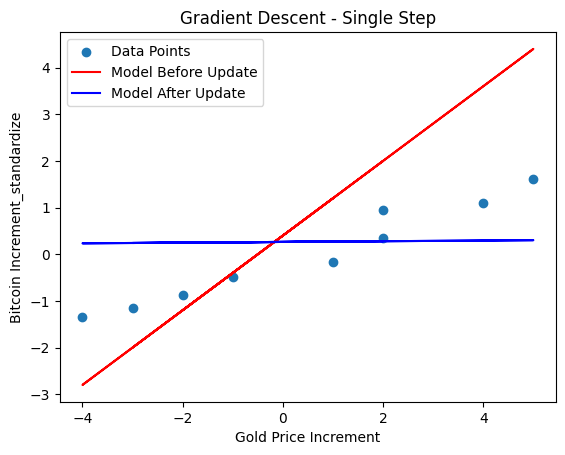

Updated theta_0: 0.26399999999999996
Updated theta_1: 0.0074990847922647985


In [ ]:
### START CODE HERE ###
y = df['Bitcoin Increment_standardize']
x = df['Gold Price Increment']

theta_0 = 0.4
theta_1 = 0.8
alpha = 0.01

h_before = theta_1 * x + theta_0
grad_J_theta_0 = (-2)*(np.sum(y - h_before))
grad_J_theta_1 = (-2)*(np.sum((y - h_before) * x))
theta_0 -= alpha * grad_J_theta_0
theta_1 -= alpha * grad_J_theta_1
h_after = theta_1 * x + theta_0

plt.scatter(x, y, label="Data Points")
plt.plot(x, h_before, label="Model Before Update", color="red")
plt.plot(x, h_after, label="Model After Update", color="blue")
plt.xlabel("Gold Price Increment")
plt.ylabel("Bitcoin Increment_standardize")
plt.title("Gradient Descent - Single Step")
plt.legend()
plt.show()

print("Updated theta_0:", theta_0)
print("Updated theta_1:", theta_1)

In [ ]:
# !apt-get install imagemagick -y

Now let's create N iterations of gradient descent, <span style='color: orange;'>***print all parameters and loss every iteration***</span> then <span style='color: orange;'>***plot the loss history***</span> and <span style='color: orange;'>***save the animation to show the change of model in each iteration to .gif***</span>.

Let's  $x = Gold\ Price\ Increment, y = Bitcoin\ Increment\_standardize, \theta_0 \in [0,1], \theta_1 \in [0,1], learning\ rate = alpha$


In [ ]:
def gradient_descent(N, theta_0, theta_1, alpha, x, y, loss_history):
    fig, ax = plt.subplots()
    scatter = ax.scatter(x, y)
    line, = ax.plot([], [], color='red')

    def update(frame):
        nonlocal theta_0, theta_1, loss_history

        h_before = theta_1 * x + theta_0
        J = (1 / (2 * len(y))) * np.sum((h_before - y)**2)

        # Calculate gradients
        grad_J_theta_0 = -2 * np.sum(y - h_before)
        grad_J_theta_1 = -2 * np.sum((y - h_before) * x)

        # Update theta_0 and theta_1
        theta_0 -= alpha * grad_J_theta_0
        theta_1 -= alpha * grad_J_theta_1

        # Calculate hypothesis after update
        h_after = theta_1 * x + theta_0
        loss_history[J] = [theta_0, theta_1]

        # Update scatter and line data
        scatter.set_offsets(np.column_stack((x, y)))
        line.set_data(x, h_after)

        return scatter, line

    ani = FuncAnimation(fig, update, frames=N,interval=30 ,blit=True)
    ani.save(filename="/content/pillow_example.gif", writer="pillow")
    plt.show()
    return theta_0, theta_1

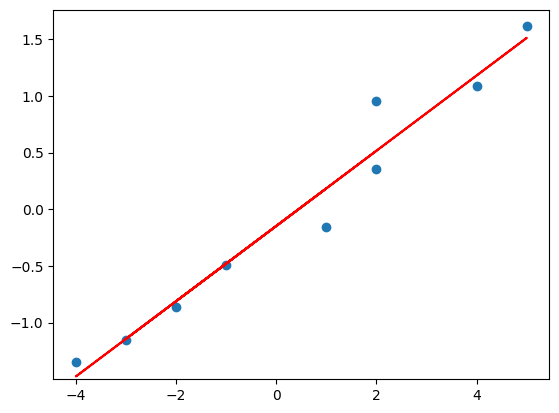

In [ ]:
y = df['Bitcoin Increment_standardize']
x = df['Gold Price Increment']
theta_0 = 0.4
theta_1 = 0.8
alpha = 0.01
loss_history = {}
last_theta_0, last_theta_1 = gradient_descent(30, theta_0, theta_1, alpha, x, y, loss_history)

### Show Figure of scatter plot of data and regression model (Red line) at each iteration
Try figure animation using FuncAnimation()**

<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

![SegmentLocal](parameter_update_animation.gif "segment")

</details>

In [ ]:
# ทำรวบไว้ใน block ข้างบนแล้ว

### Best Parameters

In [ ]:
### START CODE HERE ###
best_params = []
for i in loss_history.keys():
  if i == min(loss_history.keys()):
    print(loss_history[i])
    best_params += loss_history[i]
### END CODE HERE ###

[-0.1466939398032475, 0.33201610549372307]


### Create the `Predicted_standardize` columns from the best parameters set

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical, depending on your initial parameters value.</br>
<br>

| Gold Price Increment | Bitcoin Increment | Bitcoin Increment_standardize | Predicted_standardize |
|----------------------|-------------------|-------------------------------|------------------------|
| -1                | 846                           | -0.493265              | -0.169845              |
| -4                | 424                           | -1.351452              | -1.063912              |
| 2                 | 1560                          | 0.958738               | 0.724223               |
| -3                | 523                           | -1.150124              | -0.765890              |



</details>

In [ ]:
### START CODE HERE ###
df['Predicted_standardize'] = best_params[1] * x + best_params[0]
### END CODE HERE ###
df

,No,Gold Price Increment,Bitcoin Increment_standardize,Bitcoin Increment original,Predicted_standardize
0,1,-1,-0.493265,846,-0.478710
1,2,-4,-1.351452,424,-1.474758
2,3,2,0.958738,1560,0.517338
3,4,-3,-1.150124,523,-1.142742
4,5,1,-0.155685,1012,0.185322
5,6,-2,-0.865418,663,-0.810726
6,7,4,1.088890,1624,1.181370
7,8,5,1.613563,1882,1.513387
8,9,2,0.354753,1263,0.517338


Create the `Predicted` that inverse standardize of `Predicted_standardize`


<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical, depending on your initial parameters value.</br>
<br>

| Gold Price Increment | Bitcoin Increment | Bitcoin Increment_standardize | Predicted_standardize | Predicted       |
|----------------------|-------------------|-------------------------------|------------------------|-----------------|
| -1                | 846                           | -0.493265              | -0.239102	   | 970.981043| 1005.037081     |
| -4                | 424                           | -1.351452              | -1.148680	   | 523.710247     |
| 2                 | 1560                          | 0.958738               | 0.670476	       | 1418.251840     |
| -3                | 523                           | -1.150124              | -0.845487	   | 672.800513     |



</details>

In [ ]:
### START CODE HERE ###
y_pred = df['Predicted_standardize']
y_origin = df['Bitcoin Increment original']
df['Predicted'] = y_pred * np.std(y_origin) + np.mean(y_origin)
### END CODE HERE ###
df

,No,Gold Price Increment,Bitcoin Increment_standardize,Bitcoin Increment original,Predicted_standardize,Predicted
0,1,-1,-0.493265,846,-0.478710,853.157373
1,2,-4,-1.351452,424,-1.474758,363.366181
2,3,2,0.958738,1560,0.517338,1342.948565
3,4,-3,-1.150124,523,-1.142742,526.629911
4,5,1,-0.155685,1012,0.185322,1179.684834
5,6,-2,-0.865418,663,-0.810726,689.893642
6,7,4,1.088890,1624,1.181370,1669.476026
7,8,5,1.613563,1882,1.513387,1832.739757
8,9,2,0.354753,1263,0.517338,1342.948565


In [ ]:
print(best_params[0], best_params[1])
print(last_theta_0, last_theta_1)

-0.1466939398032475 0.33201610549372307
-0.1466939398032475 0.33201610549372307


## Question
1. What would be the iteration that gives the best parameters?
2. What are the best regression model parameters?
3. Show regression model equation of best parameters compared to the regression model equation from the last iteration (#30)

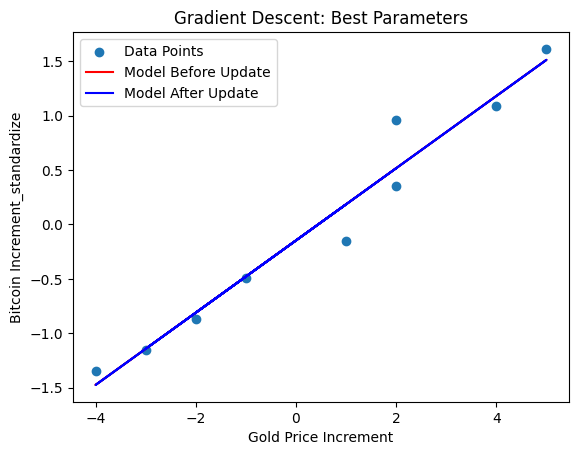

In [ ]:
# Ans
# 1. iteration ที่มีค่า loss น้อยที่สุด
# 2. theta_0, theta_1 = -0.1466939398032475, 0.33201610549372307
# 3.
y = df['Bitcoin Increment_standardize']
x = df['Gold Price Increment']

theta_0, theta_1 = best_params[0], best_params[1]

h_before = theta_1 * x + theta_0
grad_J_theta_0 = (-2)*(np.sum(y - h_before))
grad_J_theta_1 = (-2)*(np.sum((y - h_before) * x))
theta_0 -= alpha * grad_J_theta_0
theta_1 -= alpha * grad_J_theta_1
h_after = theta_1 * x + theta_0

plt.scatter(x, y, label="Data Points")
plt.plot(x, h_before, label="Model Before Update", color="red")
plt.plot(x, h_after, label="Model After Update", color="blue")
plt.xlabel("Gold Price Increment")
plt.ylabel("Bitcoin Increment_standardize")
plt.title("Gradient Descent: Best Parameters")
plt.legend()
plt.show()

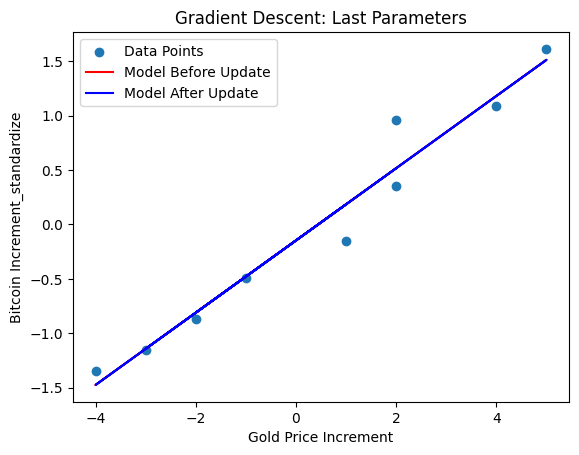

In [ ]:
x = df['Gold Price Increment']

theta_0, theta_1 = last_theta_0, last_theta_1

h_before = theta_1 * x + theta_0
grad_J_theta_0 = (-2)*(np.sum(y - h_before))
grad_J_theta_1 = (-2)*(np.sum((y - h_before) * x))
theta_0 -= alpha * grad_J_theta_0
theta_1 -= alpha * grad_J_theta_1
h_after = theta_1 * x + theta_0

plt.scatter(x, y, label="Data Points")
plt.plot(x, h_before, label="Model Before Update", color="red")
plt.plot(x, h_after, label="Model After Update", color="blue")
plt.xlabel("Gold Price Increment")
plt.ylabel("Bitcoin Increment_standardize")
plt.title("Gradient Descent: Last Parameters")
plt.legend()
plt.show()